In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sys import stderr

from typing import Dict
from numpy import typing as npt

In [2]:
def read_chains(filename: str) -> Dict[str, npt.NDArray]:
    try:
        with open(filename, "r") as f:
            chains = dict()
            for line in f.readlines():
                name, *data = line.split()
                chains[name] = np.array(list(map(float, data)))
            return chains
    except IOError as e:
        print(f"{e}", file=stderr)
        return dict()

In [3]:
chains_hc_1 = read_chains("../tf2_chains_hc_1.txt")
chains_hc_2 = read_chains("../tf2_chains_hc_2.txt")

print(f"{chains_hc_1 = }")
print(f"{chains_hc_2 = }")

chains_hc_1 = {'theta0': array([0.08797947, 0.09187836, 0.0913113 , ..., 0.10417182, 0.10668366,
       0.10886197]), 'theta1': array([2.86052389, 2.8592561 , 2.85918438, ..., 3.01503952, 3.02092355,
       3.01221302]), 'log_posterior': array([-5.23572042, -5.11182408, -5.03017481, ..., -5.56088748,
       -5.2238003 , -5.42335634])}
chains_hc_2 = {'theta0': array([0.32761832, 0.3173669 , 0.31972964, ..., 0.43348585, 0.43774413,
       0.44749138]), 'theta1': array([1.16073623, 1.17467881, 1.19006301, ..., 1.04541505, 1.03472682,
       1.03380264]), 'log_posterior': array([-5.8526072 , -6.97926868, -6.69467777, ..., -5.91998642,
       -6.17083071, -5.99273981])}


In [4]:
def plot_iterations(chains: Dict[str, npt.NDArray]):
    fig, ax = plt.subplots(nrows=3, figsize=(16, 9), sharex=True)

    ax[0].plot(range(len(chains['theta0'])), chains['theta0'])
    # ax[0].set_xlabel("Iteration", fontsize=18)
    ax[0].set_ylabel("$\\rho$", fontsize=18)

    ax[1].plot(range(len(chains['theta1'])), chains['theta1'])
    # ax[1].set_xlabel("Iteration", fontsize=18)
    ax[1].set_ylabel("$\\mu$", fontsize=18)

    ax[2].plot(range(len(chains['log_posterior'])), chains['log_posterior'])
    ax[2].set_xlabel("Iteration", fontsize=18)
    ax[2].set_ylabel("log-posterior", fontsize=18)

    plt.show()

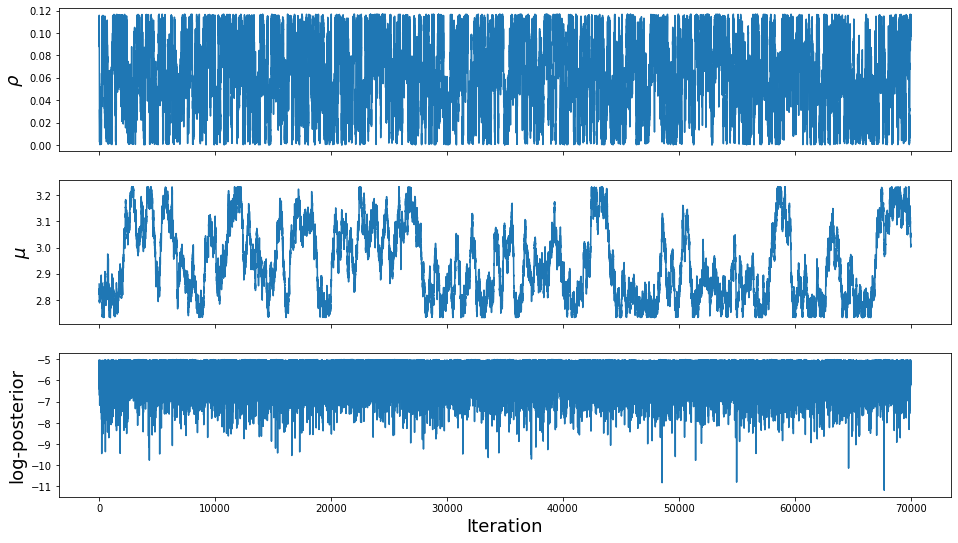

In [5]:
plot_iterations(chains=chains_hc_1)

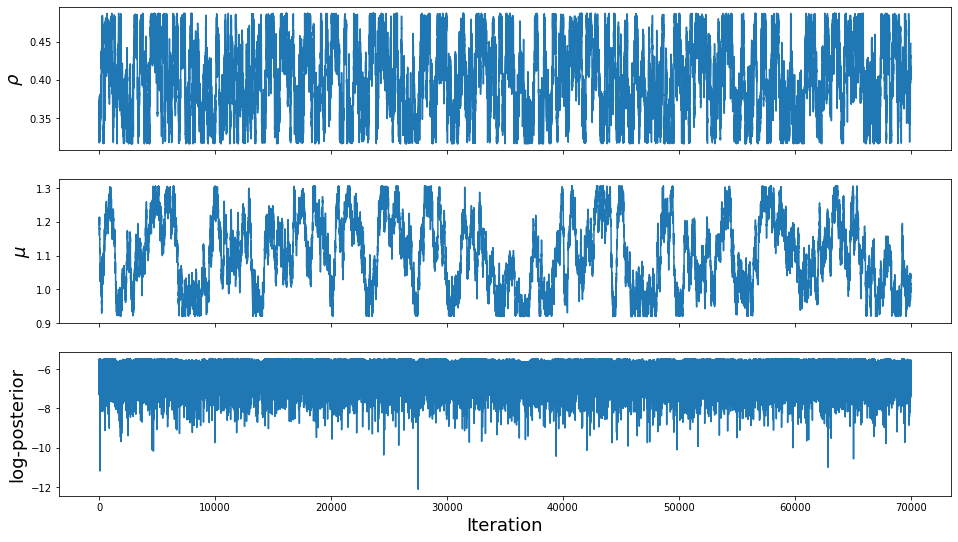

In [6]:
plot_iterations(chains=chains_hc_2)

In [7]:
def plot_histplot(chains: Dict[str, npt.NDArray]):
    fig, ax = plt.subplots(ncols=3, figsize=(16, 9))

    sns.histplot(x=chains['theta0'], stat="density", ax=ax[0])
    ax[0].set_xlabel("$\\rho$", fontsize=18)

    sns.histplot(x=chains['theta1'], stat="density", ax=ax[1])
    ax[1].set_xlabel("$\\mu$", fontsize=18)

    sns.histplot(x=chains['log_posterior'], stat="density", ax=ax[2])
    ax[2].set_xlabel("log-posterior", fontsize=18)

    plt.show()

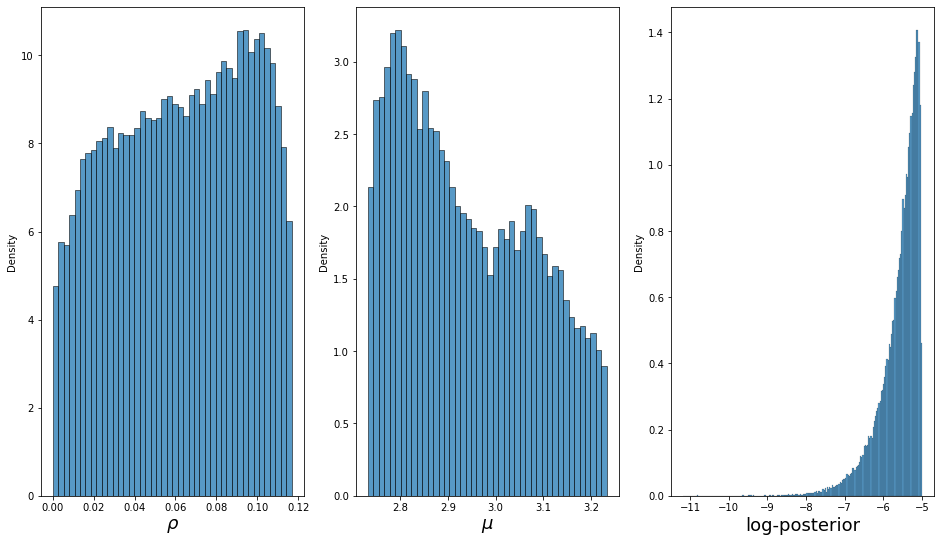

In [8]:
plot_histplot(chains=chains_hc_1)

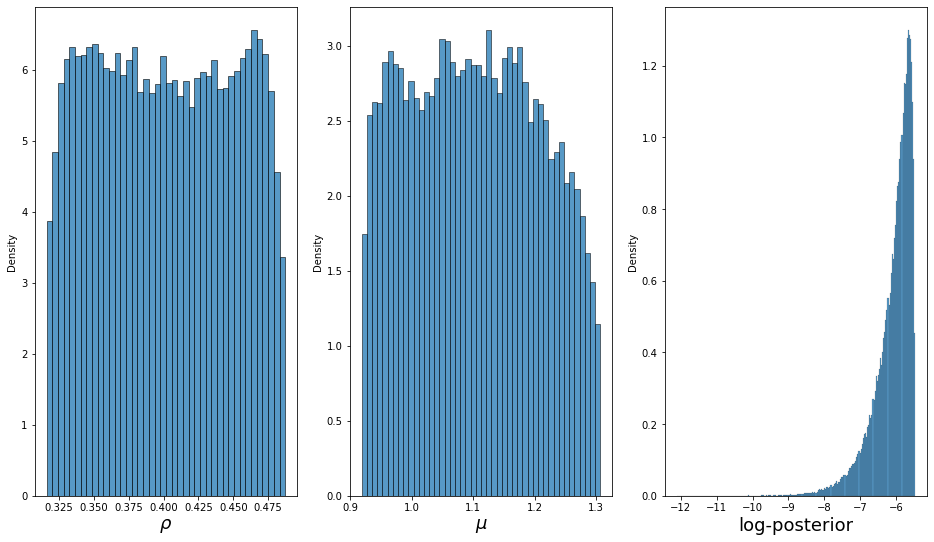

In [9]:
plot_histplot(chains=chains_hc_2)

In [10]:
def join_chains(chains1: Dict[str, npt.NDArray], chains2: Dict[str, npt.NDArray]) -> Dict[str, npt.NDArray]:
    assert chains1.keys() == chains2.keys()

    return {key: np.concatenate([chains1[key], chains2[key]]) for key in chains1}

In [11]:
joint_chains = join_chains(chains1=chains_hc_1, chains2=chains_hc_2)

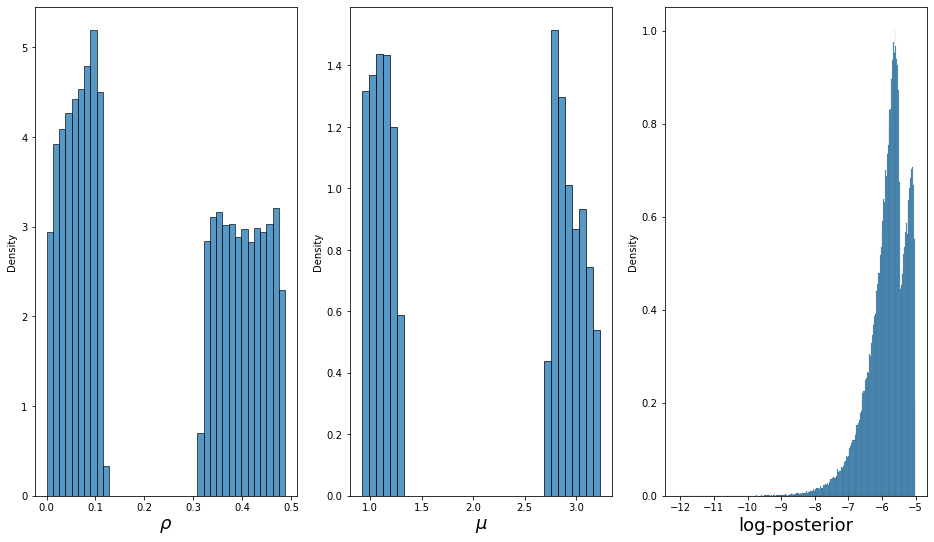

In [12]:
plot_histplot(chains=joint_chains)

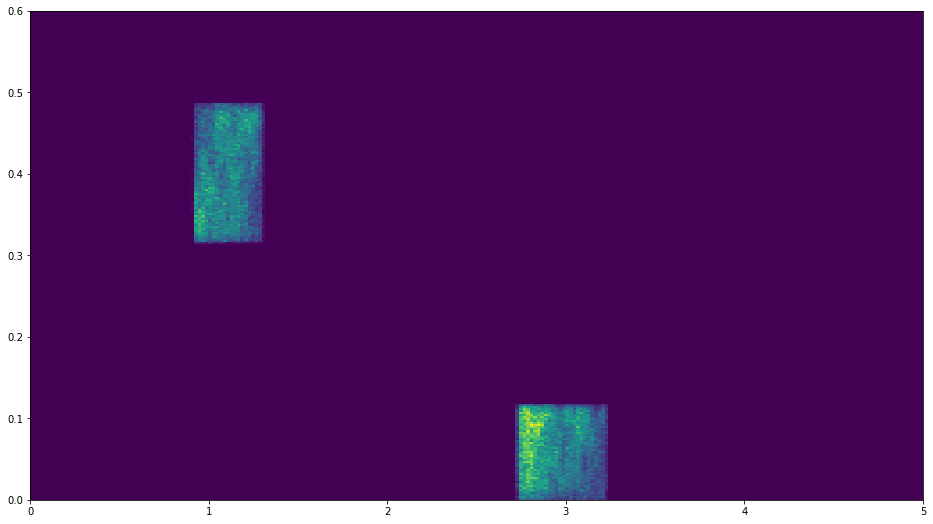

In [13]:
n = 50
theta0_bins = np.concatenate([np.linspace(0.0, 0.11682917273740534, n),
                              np.linspace(0.3160525276357454, 0.48725910880499895, n)])
theta1_bins = np.concatenate([np.linspace(0.9188771554940844, 1.3070215944139658, n),
                              np.linspace(2.732132793365194, 3.2327355608715638, n)])

fig, ax = plt.subplots(figsize=(16, 9))
# plt.hist2d(x=joint_chains["theta1"], y=joint_chains["theta0"], bins=[theta1_bins, theta0_bins], range=[[0.0, 5.0], [0.0, 0.6]], density=True)
plt.hist2d(x=joint_chains["theta1"], y=joint_chains["theta0"], bins=250, range=[[0.0, 5.0], [0.0, 0.6]], density=True)
plt.show()

In [14]:
chains_no_hc = read_chains("../tf2_chains.txt")
chains_no_hc

{'theta0': array([0.78131647, 0.77379748, 0.77902754, ..., 0.28047262, 0.2932371 ,
        0.28978368]),
 'theta1': array([3.31542825, 3.31462917, 3.31478173, ..., 2.98725024, 2.97287006,
        2.96670136]),
 'log_posterior': array([-6.83207786, -6.68811451, -6.53413212, ..., -6.00000689,
        -7.1162093 , -5.52313264])}

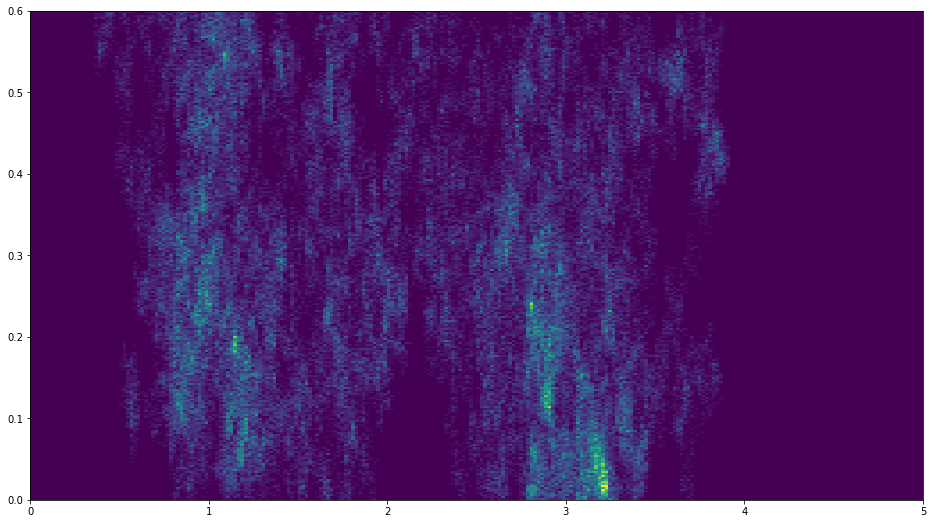

In [15]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.hist2d(x=chains_no_hc['theta1'], y=chains_no_hc['theta0'], bins=250, range=[[0.0, 5.0], [0.0, 0.6]], density=True)
plt.show()

In [16]:
def read_contour_data(file: str):
    try:
        with open(file, "r") as f:
            return np.array([list(map(float, line.split())) for line in f.readlines()])
    except IOError as e:
        print(f"{e}", file=stderr)
        return np.array([])

contour_x = read_contour_data("../model2_x_2000.txt")
contour_y = read_contour_data("../model2_y_2000.txt")
contour_z = read_contour_data("../model2_z_2000.txt")

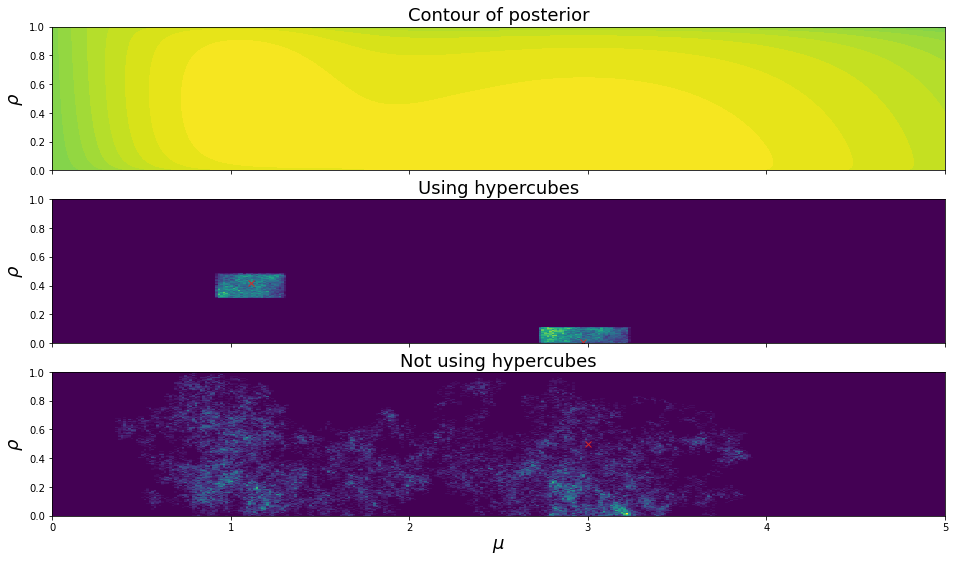

In [17]:
fig, ax = plt.subplots(nrows=3, figsize=(16, 9), sharex=True)

ax[0].contourf(contour_x, contour_y, contour_z, 50)
# ax[0].set_xlabel("$\\mu$", fontsize=18)
ax[0].set_ylabel("$\\rho$", fontsize=18)
ax[0].set_title("Contour of posterior", fontsize=18)

# ax[1].hist2d(x=joint_chains["theta1"], y=joint_chains["theta0"], bins=[theta1_bins, theta0_bins], range=[[0.0, 5.0], [0.0, 0.6]], density=True)
ax[1].hist2d(x=joint_chains["theta1"], y=joint_chains["theta0"], bins=350, range=[[0.0, 5.0], [0.0, 1.0]], density=True)
ax[1].plot([2.97502, 1.11147], [0.00528378, 0.416379], linestyle='', marker='x', color='tab:red')
# ax[1].set_xlabel("$\\mu$", fontsize=18)
ax[1].set_ylabel("$\\rho$", fontsize=18)
ax[1].set_title("Using hypercubes", fontsize=18)

ax[2].hist2d(x=chains_no_hc['theta1'], y=chains_no_hc['theta0'], bins=350, range=[[0.0, 5.0], [0.0, 1.0]], density=True)
ax[2].plot(3.0, 0.5, linestyle='', marker='x', color='tab:red')
ax[2].set_xlabel("$\\mu$", fontsize=18)
ax[2].set_ylabel("$\\rho$", fontsize=18)
ax[2].set_title("Not using hypercubes", fontsize=18)

# plt.savefig("hmc_with_hypercubes.eps")
plt.savefig("hmc_with_hypercubes.png", dpi=200)

plt.show()

# Visualize sampler path

In [39]:
ns = [100, 1000, 5000, 14000]

In [40]:
len(chains_no_hc['theta0'])

140000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


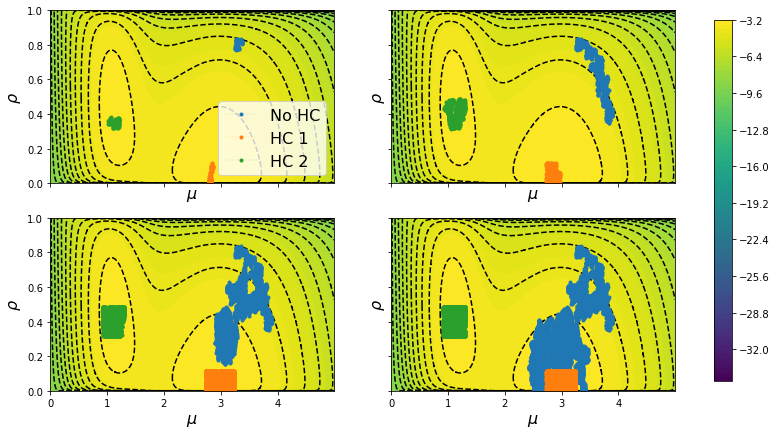

In [43]:
# 2 x 2 grid
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 7), sharex=True, sharey=True)

for i, n in enumerate(ns):

    # contour plot
    CS = ax[i // 2][i % 2].contourf(contour_x, contour_y, contour_z, levels=80)
    
    # add contour lines
    ax[i // 2][i % 2].contour(contour_x, contour_y, contour_z, levels=60, colors='k')

    #CS = plt.contourf(contour_x, contour_y, contour_z, levels=100)

    ax[i // 2][i % 2].plot(chains_no_hc['theta1'][:n], chains_no_hc['theta0'][:n], linestyle="--", linewidth=0.1, marker=".", label="No HC")
    ax[i // 2][i % 2].plot(chains_hc_1['theta1'][:n], chains_hc_1['theta0'][:n], linestyle="--", linewidth=0.1, marker=".", label="HC 1")
    ax[i // 2][i % 2].plot(chains_hc_2['theta1'][:n], chains_hc_2['theta0'][:n], linestyle="--", linewidth=0.1, marker=".", label="HC 2")

    ax[i // 2][i % 2].set_xlabel("$\\mu$", fontsize=16)
    ax[i // 2][i % 2].set_ylabel("$\\rho$", fontsize=16)

    # remove legend 
    ax[i // 2][i % 2].legend().remove()
    

# add a single colorbar
fig.colorbar(CS, ax=ax, shrink=0.95)
# label the colorbar using a label 


# add a single legend at the right bottom of the first plot
ax[0][0].legend(loc="lower right", fontsize=16)


plt.savefig("hmc_with_hypercubes_sampler_path.eps", dpi=300, format="eps")
plt.show()
    #plt.show()
    


In [19]:
print(f"{chains_no_hc['theta0'][0] = }")
print(f"{chains_no_hc['theta1'][0] = }")

chains_no_hc['theta0'][0] = 0.7813164686814532
chains_no_hc['theta1'][0] = 3.315428251343227
